# Solución Pronóstico de la evolución de pacientes con diabetes

### Por Luis Miguel Morales Álvarez

In [34]:
import pandas as pd

data = pd.read_csv(r'datos\diabetes.csv')
data.tail()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Y
437,0.0417084,0.0506801,0.0196615,0.0597439,-0.00569682,-0.00256647,-0.0286743,-0.00259226,0.031193,0.00720652,178.0
438,-0.00551455,0.0506801,-0.0159063,-0.0676423,0.0493413,0.0791653,-0.0286743,0.0343089,-0.0181183,0.0444855,104.0
439,0.0417084,0.0506801,-0.0159063,0.0172819,-0.0373437,-0.0138398,-0.0249927,-0.0110795,-0.0468795,0.0154907,132.0
440,-0.0454725,-0.0446416,0.0390622,0.00121513,0.0163184,0.015283,-0.0286743,0.0265596,0.0445284,-0.0259303,220.0
441,-0.0454725,-0.0446416,-0.0730303,-0.0814138,0.0837401,0.0278089,0.173816,-0.0394934,-0.00421986,0.00306441,57.0


In [35]:
data.isnull().sum()

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
Y      0
dtype: int64

In [36]:
pd.options.display.float_format = '{:.6}'.format
data.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Y
count,442.0,442.0,442.0,442.0,442.0,442.0,442.0,442.0,442.0,442.0,442.0
mean,-3.6346e-16,1.29641e-16,-8.04221e-16,1.28165e-16,-8.83532e-17,1.32702e-16,-4.57527e-16,3.78076e-16,-3.83085e-16,-3.41195e-16,152.133
std,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,0.047619,77.093
min,-0.107226,-0.0446416,-0.0902753,-0.1124,-0.126781,-0.115613,-0.102307,-0.0763945,-0.126097,-0.137767,25.0
25%,-0.0372993,-0.0446416,-0.0342291,-0.0366564,-0.0342478,-0.0303584,-0.0351172,-0.0394934,-0.0332488,-0.033179,87.0
50%,0.00538306,-0.0446416,-0.00728377,-0.00567061,-0.00432087,-0.00381907,-0.00658447,-0.00259226,-0.00194763,-0.0010777,140.5
75%,0.0380759,0.0506801,0.031248,0.0356438,0.028358,0.0298444,0.0293115,0.0343089,0.0324332,0.0279171,211.5
max,0.110727,0.0506801,0.170555,0.132044,0.153914,0.198788,0.181179,0.185234,0.133599,0.135612,346.0


#### Con SkLearn

In [37]:
from sklearn import linear_model
import numpy as np

X = data[["age", "sex", "bmi", "bp","s1","s2","s3","s4","s5","s6"]]
Y = data["Y"]

m = linear_model.LinearRegression()
m.fit(X, Y)

print('Intercept: ', m.intercept_)
print('Coefficients: ', m.coef_)

Intercept:  152.1334841628965
Coefficients:  [ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
  476.74583782  101.04457032  177.06417623  751.27932109   67.62538639]


#### Con Statsmodels

In [38]:
import sklearn
import statsmodels.api as sm

def get_sse(y_pred, y_desired):
    return sklearn.metrics.mean_squared_error(y_desired, y_pred, sample_weight=None)

def print_sse(y_pred, y_desired):
    sse = get_sse(y_pred, y_desired) ** (1/2)
    print("SSE is:", sse)
    return sse

def fit_linear_model(X, Y):
    X2 = sm.add_constant(X)
    model = sm.OLS(Y, X2).fit()
    predictions = model.predict(X2) 

    print_model = model.summary()
    print(print_model)
    print_sse(predictions, Y)
    
fit_linear_model(X, Y)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Wed, 10 Apr 2019   Prob (F-statistic):           3.83e-62
Time:                        19:12:52   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.576     59.061      0.0

### Selección de parametros relevantes

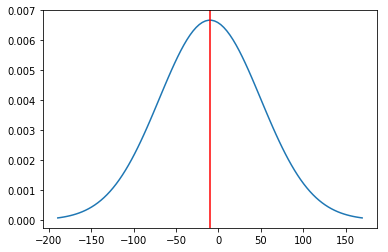

In [39]:
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
%matplotlib inline

def plot_normal(mu, sd):
    x = np.linspace(mu - 3 * sd, mu + 3 * sd, 100)
    plt.plot(x, stats.norm.pdf(x, mu, sd))
    plt.axvline(x=mu, color='red')
    plt.show()
    
plot_normal(-10.0122, 59.749)

Se observa que 'age' no es una variable significativa, por lo que se descarta del modelo

In [40]:
X = data[["sex", "bmi", "bp","s1","s2","s3","s4","s5","s6"]]

fit_linear_model(X, Y)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     51.53
Date:                Wed, 10 Apr 2019   Prob (F-statistic):           5.24e-63
Time:                        19:12:52   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4792.
Df Residuals:                     432   BIC:                             4833.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.573     59.128      0.0

's3' tiene el mayor valor P con 0.639

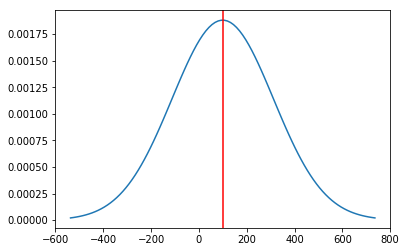

In [41]:
plot_normal(99.7175, 212.146)

's3' no es una variable significativa, por lo que se descarta

In [42]:
X = data[["sex", "bmi", "bp","s1","s2","s4","s5","s6"]]

fit_linear_model(X, Y)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     58.04
Date:                Wed, 10 Apr 2019   Prob (F-statistic):           7.42e-64
Time:                        19:12:52   Log-Likelihood:                -2386.1
No. Observations:                 442   AIC:                             4790.
Df Residuals:                     433   BIC:                             4827.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.571     59.181      0.0

's6' tiene el mayor P con 0.304

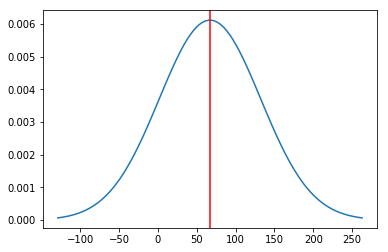

In [43]:
plot_normal(67.1413, 65.245)

's6' no es una variable significativa, por lo que se descarta

In [44]:
X = data[["sex", "bmi", "bp","s1","s2","s4","s5"]]

fit_linear_model(X, Y)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     66.18
Date:                Wed, 10 Apr 2019   Prob (F-statistic):           1.48e-64
Time:                        19:12:52   Log-Likelihood:                -2386.7
No. Observations:                 442   AIC:                             4789.
Df Residuals:                     434   BIC:                             4822.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.571     59.177      0.0

's4' tiene el mayor P con 0.262

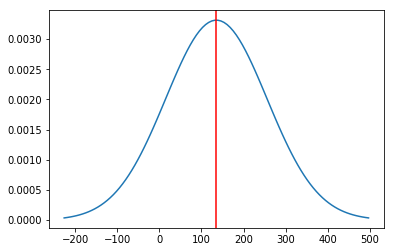

In [45]:
plot_normal(135.2653, 120.414)

's4' no es una variable significativa, por lo que se descarta

In [46]:
X = data[["sex","bmi","bp","s1","s2","s5"]]

fit_linear_model(X, Y)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     76.95
Date:                Wed, 10 Apr 2019   Prob (F-statistic):           3.01e-65
Time:                        19:12:53   Log-Likelihood:                -2387.3
No. Observations:                 442   AIC:                             4789.
Df Residuals:                     435   BIC:                             4817.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.572     59.159      0.0

Ya las variables 'sex', 'bmi', 'bp', 's1', 's2' y 's5' son relevantes

In [47]:
from tqdm import tqdm_notebook as tqdm
from sklearn.neural_network import MLPClassifier

def fit_model(X, Y, mu, hl):
    clf = MLPClassifier(solver='lbfgs', alpha=mu, hidden_layer_sizes=(hl), random_state=1)
    clf.fit(X, Y)
    
    y_pred = clf.predict(X)
    return print_sse(y_pred, Y), clf

fit_model(X, Y, 0.05, 5)
fit_model(X, Y, 0.01, 5)

SSE is: 64.69524799490432
SSE is: 63.747380391568484


(63.747380391568484,
 MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
        beta_2=0.999, early_stopping=False, epsilon=1e-08,
        hidden_layer_sizes=5, learning_rate='constant',
        learning_rate_init=0.001, max_iter=200, momentum=0.9,
        n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
        random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
        validation_fraction=0.1, verbose=False, warm_start=False))

In [49]:
from tqdm import tqdm_notebook as tqdm
import itertools

least_error = 9999999.0
best_model = None
best_mu = 0
best_hl = 0 #Hidden layer count

for (mu, hl) in tqdm(itertools.product(np.arange(0.001, 0.8, step=0.001), range(1, 10))):
    err, model = fit_model(X, Y, mu, hl)
    if err < least_error:
        least_error = err
        best_model = model
        best_mu = mu
        best_hl = hl
print('Best fit is: ', best_model)
print('with alpha=', best_mu, ' and # neuron hidden layer=', best_hl)

SSE is: 111.13622353218358
SSE is: 72.12795003651905
SSE is: 71.16744641944274
SSE is: 69.76653050195733
SSE is: 62.00085753311505
SSE is: 73.93027472126687
SSE is: 70.24527165614245
SSE is: 78.23248217312504
SSE is: 71.48253908238821
SSE is: 111.13622353218358
SSE is: 72.4880080580036
SSE is: 70.95999765338445
SSE is: 69.42752332810896
SSE is: 64.18659168421547
SSE is: 63.03552471079789
SSE is: 70.53137038328971
SSE is: 75.5531337410934
SSE is: 71.50524456289902
SSE is: 111.13622353218358
SSE is: 71.81630349693447
SSE is: 71.15315518803556
SSE is: 68.87530538812653
SSE is: 63.47631118336953
SSE is: 63.57261498133934
SSE is: 70.75237232803752
SSE is: 76.28917656875359
SSE is: 71.1592440168512
SSE is: 111.13622353218358
SSE is: 71.55785875304869
SSE is: 70.62647908193719
SSE is: 69.18052978517485
SSE is: 65.83178206164379
SSE is: 73.3791061043243
SSE is: 70.97606504980922
SSE is: 74.97207624972494
SSE is: 72.28098452554379
SSE is: 111.13622353218358
SSE is: 71.17273932854778
SSE is: 70.

SSE is: 111.13622353218358
SSE is: 70.83937601765092
SSE is: 69.71894125150475
SSE is: 66.46803743153546
SSE is: 65.87120643425375
SSE is: 69.53120332120046
SSE is: 70.2244945728273
SSE is: 68.61313608514709
SSE is: 68.99960653045396
SSE is: 111.13622353218358
SSE is: 70.01263622210801
SSE is: 70.25068235284782
SSE is: 68.02583020192134
SSE is: 67.74118967275776
SSE is: 70.2476066805403
SSE is: 70.8592384534871
SSE is: 68.9157791466121
SSE is: 69.31091012563202
SSE is: 111.13622353218358
SSE is: 69.89515418958256
SSE is: 69.61121834486892
SSE is: 67.38329948714114
SSE is: 68.08223002552772
SSE is: 70.47917763168076
SSE is: 70.39185730367281
SSE is: 70.01420347174425
SSE is: 69.50728338410957
SSE is: 111.13622353218358
SSE is: 69.71118505137441
SSE is: 69.88157403164493
SSE is: 67.51317954121778
SSE is: 66.29394299502825
SSE is: 70.32794865479121
SSE is: 69.82366283290153
SSE is: 66.69770393654672
SSE is: 69.35563149384123
SSE is: 111.13622353218358
SSE is: 70.26512493979806
SSE is: 69.

SSE is: 70.9410723530899
SSE is: 71.12243283584081
SSE is: 68.88128353710793
SSE is: 67.64264298001126
SSE is: 68.35871580968532
SSE is: 67.44704643198388
SSE is: 70.68121986517323
SSE is: 68.78996164797167
SSE is: 111.13622353218358
SSE is: 71.24221002108078
SSE is: 70.96517851091458
SSE is: 69.43767347584132
SSE is: 65.7913883979531
SSE is: 68.67491786592396
SSE is: 67.37419985001577
SSE is: 70.9438787821161
SSE is: 69.72040152738846
SSE is: 111.13622353218358
SSE is: 71.05122108802598
SSE is: 71.08197421866903
SSE is: 69.05313057080728
SSE is: 67.05721201524798
SSE is: 66.02926815733812
SSE is: 65.5395980612267
SSE is: 70.96509880827884
SSE is: 67.54482339469705
SSE is: 111.13622353218358
SSE is: 71.05883102094593
SSE is: 71.18519915815028
SSE is: 68.99855726736158
SSE is: 69.75039531829783
SSE is: 68.51761011541196
SSE is: 66.1481608627206
SSE is: 70.07972189452866
SSE is: 68.39607170323738
SSE is: 111.13622353218358
SSE is: 71.08553893833714
SSE is: 71.03985243146387
SSE is: 68.73

SSE is: 70.30682593998719
SSE is: 68.85674354209411
SSE is: 66.5598087797462
SSE is: 69.01613031997586
SSE is: 71.57097859730274
SSE is: 67.22357510407905
SSE is: 90.67021691434358
SSE is: 71.04394472048948
SSE is: 71.17447175683324
SSE is: 71.37953811519421
SSE is: 70.08111008645785
SSE is: 66.52859760014887
SSE is: 69.22347246614758
SSE is: 71.46267576259177
SSE is: 66.98956493331444
SSE is: 90.67021691434358
SSE is: 71.21022347670178
SSE is: 71.18578713193217
SSE is: 71.13332711355729
SSE is: 69.31742188927373
SSE is: 66.02952513872297
SSE is: 69.1725333244044
SSE is: 70.77585548375247
SSE is: 68.02213839785688
SSE is: 90.67021691434358
SSE is: 70.99601671319505
SSE is: 71.02704857277456
SSE is: 70.32241521341516
SSE is: 69.42641535698978
SSE is: 65.79340007335591
SSE is: 69.23406100771433
SSE is: 70.43899192713087
SSE is: 68.61209739909036
SSE is: 90.67021691434358
SSE is: 71.22024662560335
SSE is: 71.08203787594503
SSE is: 69.09345104549031
SSE is: 67.94900936219135
SSE is: 64.869

SSE is: 70.0618827952438
SSE is: 71.33871788645531
SSE is: 68.16615314354435
SSE is: 90.67021691434358
SSE is: 72.06727626109029
SSE is: 71.64966300091575
SSE is: 72.11176280497953
SSE is: 68.5161407148822
SSE is: 67.19390122616002
SSE is: 69.78305100914402
SSE is: 71.86450297142754
SSE is: 66.0217124576234
SSE is: 90.67021691434358
SSE is: 72.05371299635492
SSE is: 72.20753147567056
SSE is: 72.1927723535431
SSE is: 68.64371257455485
SSE is: 67.24689432516635
SSE is: 69.95088774870966
SSE is: 70.53055241191161
SSE is: 68.56903579374044
SSE is: 90.67021691434358
SSE is: 72.05321060418503
SSE is: 72.05000777175185
SSE is: 72.29522492883822
SSE is: 68.29194383498087
SSE is: 67.21108775151673
SSE is: 70.02255615900296
SSE is: 71.0610119602478
SSE is: 68.42768749774899
SSE is: 90.67021691434358
SSE is: 72.06068332626303
SSE is: 71.71823007357946
SSE is: 72.24458833010557
SSE is: 68.29041988422534
SSE is: 66.91823199813079
SSE is: 70.09408673686471
SSE is: 71.80919917373296
SSE is: 69.885685

SSE is: 72.04509334516212
SSE is: 72.38059288403448
SSE is: 70.46587056176308
SSE is: 69.80436462906147
SSE is: 68.03527498683265
SSE is: 70.18572646268629
SSE is: 72.42051345600063
SSE is: 69.68667757666603
SSE is: 90.67021691434358
SSE is: 72.3618984265297
SSE is: 72.43713142477257
SSE is: 69.90005793665347
SSE is: 68.17174545094217
SSE is: 68.12099961271336
SSE is: 70.16847856848105
SSE is: 72.54468119187491
SSE is: 70.99714798936951
SSE is: 90.67021691434358
SSE is: 72.17956179052
SSE is: 72.12123716824838
SSE is: 70.28803055868762
SSE is: 69.0499851737036
SSE is: 69.15342965160286
SSE is: 70.28151215096503
SSE is: 72.50409568709009
SSE is: 69.50695788602847
SSE is: 90.67021691434358
SSE is: 72.1414993440101
SSE is: 72.04565859978604
SSE is: 70.5991809009949
SSE is: 69.84245360661275
SSE is: 68.28554963967677
SSE is: 69.95937735313265
SSE is: 72.09014279208223
SSE is: 69.7387172794482
SSE is: 90.67021691434358
SSE is: 72.23596013518187
SSE is: 71.98854546893577
SSE is: 70.582130203

SSE is: 69.20224148280418
SSE is: 66.6786885842262
SSE is: 71.99695192140325
SSE is: 71.24613191056196
SSE is: 66.89936387498635
SSE is: 90.67021691434358
SSE is: 73.07445220876349
SSE is: 73.09424895824041
SSE is: 71.12833344740002
SSE is: 69.12491152735863
SSE is: 67.21519436065908
SSE is: 72.05947455611349
SSE is: 70.95003340252212
SSE is: 67.39545280524146
SSE is: 90.67021691434358
SSE is: 72.72204256697636
SSE is: 73.18897934001114
SSE is: 70.9861212615868
SSE is: 70.01824261321141
SSE is: 68.29605170676436
SSE is: 72.24811134389729
SSE is: 71.51155651314077
SSE is: 67.41146363834756
SSE is: 90.67021691434358
SSE is: 72.98058069357246
SSE is: 73.07445220876349
SSE is: 70.77737386752712
SSE is: 69.2982765386104
SSE is: 66.40808637998526
SSE is: 72.09055077686824
SSE is: 70.82556163558094
SSE is: 67.03239238576582
SSE is: 90.67021691434358
SSE is: 72.94459559932676
SSE is: 73.21671791882937
SSE is: 70.18321208037256
SSE is: 69.24007353264027
SSE is: 69.01429453873112
SSE is: 72.0117

SSE is: 72.06669547915367
SSE is: 71.64623687199874
SSE is: 66.22744642996199
SSE is: 90.67021691434358
SSE is: 73.4360774147377
SSE is: 74.15034562061129
SSE is: 71.11328671571377
SSE is: 69.79652067719805
SSE is: 64.76462779615629
SSE is: 71.83091949484646
SSE is: 71.36035947903693
SSE is: 66.7943253611599
SSE is: 90.67021691434358
SSE is: 73.60522064899561
SSE is: 73.66550301763797
SSE is: 71.2603092486143
SSE is: 69.78648756137427
SSE is: 65.98669823450331
SSE is: 71.92965706585052
SSE is: 71.73363877656492
SSE is: 68.59536084467932
SSE is: 90.67021691434358
SSE is: 73.51078044497255
SSE is: 73.6599438658267
SSE is: 71.04646048545496
SSE is: 70.53792984991345
SSE is: 66.43400767352223
SSE is: 72.17666235172761
SSE is: 71.4324032585641
SSE is: 65.10927118752087
SSE is: 90.67021691434358
SSE is: 73.62361476852186
SSE is: 72.92432388150515
SSE is: 70.33163201247687
SSE is: 69.84813843932359
SSE is: 66.34712636181456
SSE is: 71.67656110448314
SSE is: 71.39215199527072
SSE is: 65.522991

SSE is: 74.5569113608806
SSE is: 74.76365475549058
SSE is: 70.9790772817223
SSE is: 69.28449775353269
SSE is: 65.5592716520517
SSE is: 71.29425671626
SSE is: 71.31127991092248
SSE is: 69.08524801441094
SSE is: 90.67021691434358
SSE is: 74.67964765420132
SSE is: 74.79153532089116
SSE is: 71.34426763859082
SSE is: 69.17788075331856
SSE is: 66.64293318114402
SSE is: 71.23706519090729
SSE is: 71.29425671626
SSE is: 69.02209627181469
SSE is: 90.67021691434358
SSE is: 74.28511479793907
SSE is: 74.7771954493883
SSE is: 71.19460615595368
SSE is: 69.28449775353269
SSE is: 65.09125164508654
SSE is: 71.26003938161755
SSE is: 71.29425671626
SSE is: 68.99140873788569
SSE is: 90.67021691434358
SSE is: 74.53580329513245
SSE is: 74.83133372316259
SSE is: 71.05711169314404
SSE is: 69.16590978887704
SSE is: 66.40442388359541
SSE is: 71.20826951315993
SSE is: 71.25786453380815
SSE is: 69.1090193902791
SSE is: 90.67021691434358
SSE is: 74.65443769712088
SSE is: 74.52587694782014
SSE is: 71.39669941798995


SSE is: 71.25475295729068
SSE is: 68.84371440861294
SSE is: 68.04776070934709
SSE is: 71.22955370677938
SSE is: 71.20998519133553
SSE is: 69.09693826667035
SSE is: 90.67021691434358
SSE is: 75.60079125253287
SSE is: 75.95015035776109
SSE is: 70.99730732259374
SSE is: 69.01080314143753
SSE is: 66.90382778246475
SSE is: 70.9901847781905
SSE is: 71.1998017181641
SSE is: 69.52269397380661
SSE is: 90.67021691434358
SSE is: 75.32188843774466
SSE is: 75.2419476006106
SSE is: 71.72827686036703
SSE is: 69.14693516370727
SSE is: 67.40861083333225
SSE is: 71.63395198453787
SSE is: 70.97600129748784
SSE is: 68.96953225947308
SSE is: 90.67021691434358
SSE is: 75.58049857407585
SSE is: 74.93346973734653
SSE is: 71.03450184585436
SSE is: 68.9968357855365
SSE is: 67.71496689862181
SSE is: 71.02649113844012
SSE is: 73.00184402307404
SSE is: 68.88207182572636
SSE is: 90.67021691434358
SSE is: 75.49853913662639
SSE is: 75.75391810723248
SSE is: 71.30166619238258
SSE is: 68.92016169295314
SSE is: 66.65566

SSE is: 68.90842503441783
SSE is: 69.35489751960384
SSE is: 72.41856090672408
SSE is: 70.76834300053042
SSE is: 68.97150044259706
SSE is: 111.13622353218358
SSE is: 75.69120405331603
SSE is: 78.64583536853353
SSE is: 71.2669286073293
SSE is: 69.45936993954228
SSE is: 68.88890328256876
SSE is: 71.55403299611456
SSE is: 70.81629730366383
SSE is: 68.85955277991408
SSE is: 111.13622353218358
SSE is: 78.51807585068624
SSE is: 76.44250789694605
SSE is: 71.39365727179505
SSE is: 68.97150044259706
SSE is: 69.40889728719534
SSE is: 71.06352712100511
SSE is: 71.11306401290248
SSE is: 69.40187252158448
SSE is: 111.13622353218358
SSE is: 78.22575810287319
SSE is: 78.51807585068624
SSE is: 71.3395900189537
SSE is: 69.40889728719534
SSE is: 69.40889728719534
SSE is: 72.06512577482383
SSE is: 70.9724151372013
SSE is: 68.95112702887485
SSE is: 111.13622353218358
SSE is: 77.91861109357077
SSE is: 78.74401507100245
SSE is: 71.11618178879681
SSE is: 69.46982482406281
SSE is: 69.40889728719534
SSE is: 71.

SSE is: 69.9428984942271
SSE is: 70.18093938808218
SSE is: 72.61173321788276
SSE is: 71.98614120014267
SSE is: 70.04814117054045
SSE is: 111.13622353218358
SSE is: 76.87128573229244
SSE is: 76.89918180901489
SSE is: 71.87358497525061
SSE is: 70.07713913869668
SSE is: 70.00756261668744
SSE is: 72.76488512179023
SSE is: 71.83913968687422
SSE is: 70.04814117054045
SSE is: 111.13622353218358
SSE is: 78.47020070185908
SSE is: 78.08608487806076
SSE is: 72.10407573470837
SSE is: 70.14180852506885
SSE is: 70.20996306812268
SSE is: 72.77645061904217
SSE is: 71.86393629190177
SSE is: 69.94276910607876
SSE is: 111.13622353218358
SSE is: 78.02724608251735
SSE is: 77.58760921740273
SSE is: 71.45564709847952
SSE is: 70.09476455556111
SSE is: 70.03300773168108
SSE is: 72.83915833139027
SSE is: 71.81507486158854
SSE is: 69.95402497969455
SSE is: 111.13622353218358
SSE is: 76.07034134654047
SSE is: 77.0313152517323
SSE is: 71.9517183516534
SSE is: 70.02947020242677
SSE is: 69.9375286849059
SSE is: 72.7

### Cross-Validation

In [65]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

X = np.array(X)
Y = np.array(Y)

clf = MLPClassifier(solver='lbfgs', alpha=0.017, hidden_layer_sizes=(6), random_state=1)
scoring = ['precision_macro', 'recall_macro']

scores = cross_validate(clf, X, Y, scoring=scoring, cv=5, return_train_score=False)
print(sorted(scores.keys()))
print(scores['test_recall_macro'])
    

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\user\Anaconda3\lib\sit

['fit_time', 'score_time', 'test_precision_macro', 'test_recall_macro']
[0.01635514 0.00653595 0.01204819 0.         0.        ]
